In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime
import h5py
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchviz import make_dot

In [2]:
noise_weights = {
    1098.4:5.9242e-24,
    1100.9:5.9353e-24,
    1103.4:5.9463e-24,
    1106:5.9574e-24,
    1108.5:5.9685e-24,
    1111.1:5.9797e-24,
    1113.7:5.9909e-24,
    1116.2:6.0021e-24,
    1118.8:6.0133e-24,
    1121.4:6.0246e-24,
    1124:6.0359e-24,
    1126.6:6.0473e-24,
    1129.2:6.0586e-24,
    1131.8:6.0701e-24,
    1134.4:6.0815e-24,
    1137:6.093e-24,
    1139.6:6.1045e-24,
    1142.2:6.116e-24,
    1144.9:6.1276e-24,
    1147.5:6.1392e-24,
    1150.2:6.1509e-24,
    1152.8:6.1625e-24,
    1155.5:6.1742e-24,
    1158.1:6.186e-24,
    1160.8:6.1978e-24,
    1163.5:6.2096e-24,
    1166.2:6.2214e-24,
    1168.9:6.2333e-24,
    1171.5:6.2452e-24,
    1174.2:6.2571e-24,
    1177:6.2691e-24,
    1179.7:6.2811e-24,
    1182.4:6.2932e-24,
    1185.1:6.3052e-24,
    1187.9:6.3173e-24,
    1190.6:6.3295e-24,
    1193.3:6.3417e-24,
    1196.1:6.3539e-24,
    1198.8:6.3661e-24,
    1201.6:6.3784e-24,
    1204.4:6.3907e-24,
    1207.2:6.4031e-24,
    1209.9:6.4155e-24,
    1212.7:6.4279e-24,
    1215.5:6.4403e-24,
    1218.3:6.4528e-24,
    1221.1:6.4653e-24,
    1224:6.4779e-24,
    1226.8:6.4905e-24,
    1229.6:6.5031e-24,
    1232.4:6.5158e-24,
    1235.3:6.5285e-24,
    1238.1:6.5412e-24,
    1241:6.554e-24,
    1243.9:6.5668e-24,
    1246.7:6.5796e-24,
    1249.6:6.5925e-24,
    1252.5:6.6054e-24,
    1255.4:6.6184e-24,
    1258.3:6.6313e-24,
    1261.2:6.6444e-24,
    1264.1:6.6574e-24,
    1267:6.6705e-24,
    1269.9:6.6836e-24,
    1272.8:6.6968e-24,
    1275.8:6.71e-24,
    1278.7:6.7232e-24,
    1281.7:6.7365e-24,
    1284.6:6.7498e-24,
    1287.6:6.7631e-24,
    1290.5:6.7765e-24,
    1293.5:6.7899e-24,
    1296.5:6.8034e-24,
    1299.5:6.8168e-24,
    1302.5:6.8304e-24,
    1305.5:6.8439e-24,
    1308.5:6.8575e-24,
    1311.5:6.8712e-24,
    1314.5:6.8848e-24,
    1317.6:6.8985e-24,
    1320.6:6.9123e-24,
    1323.7:6.9261e-24,
    1326.7:6.9399e-24,
    1329.8:6.9537e-24,
    1332.8:6.9676e-24,
    1335.9:6.9816e-24,
    1339:6.9955e-24,
    1342.1:7.0096e-24,
    1345.2:7.0236e-24,
    1348.3:7.0377e-24,
    1351.4:7.0518e-24,
    1354.5:7.066e-24,
    1357.6:7.0802e-24,
    1360.8:7.0944e-24,
    1363.9:7.1087e-24,
    1367:7.123e-24,
    1370.2:7.1373e-24,
    1373.4:7.1517e-24,
    1376.5:7.1661e-24,
    1379.7:7.1806e-24,
    1382.9:7.1951e-24,
    1386.1:7.2096e-24,
    1389.3:7.2242e-24,
    1392.5:7.2388e-24,
    1395.7:7.2535e-24,
    1398.9:7.2682e-24,
    1402.1:7.2829e-24,
    1405.4:7.2977e-24,
    1408.6:7.3125e-24,
    1411.8:7.3274e-24,
    1415.1:7.3423e-24,
    1418.4:7.3572e-24,
    1421.6:7.3722e-24,
    1424.9:7.3872e-24,
    1428.2:7.4022e-24,
    1431.5:7.4173e-24,
    1434.8:7.4325e-24,
    1438.1:7.4476e-24,
    1441.4:7.4629e-24,
    1444.7:7.4781e-24,
    1448.1:7.4934e-24,
    1451.4:7.5087e-24,
    1454.8:7.5241e-24,
    1458.1:7.5395e-24,
    1461.5:7.555e-24,
    1464.8:7.5705e-24,
    1468.2:7.586e-24,
    1471.6:7.6016e-24,
    1475:7.6172e-24,
    1478.4:7.6329e-24,
    1481.8:7.6486e-24,
    1485.2:7.6644e-24,
    1488.7:7.6837e-24,
    1492.1:7.6961e-24,
    1495.5:7.7118e-24,
    1499:7.7277e-24,
    1502.4:7.7436e-24,
    1505.9:7.7596e-24,
    1509.4:7.7756e-24,
    1512.9:7.7917e-24,
    1516.3:7.8078e-24,
    1519.8:7.824e-24,
    1523.3:7.8402e-24,
    1526.9:7.8564e-24,
    1530.4:7.8727e-24,
    1533.9:7.889e-24,
    1537.4:7.9054e-24,
    1541:7.9218e-24,
    1544.5:7.9382e-24,
    1548.1:7.9547e-24,
    1551.7:7.9713e-24,
    1555.3:7.9879e-24,
    1558.8:8.0045e-24,
    1562.4:8.0211e-24,
    1566:8.0378e-24,
    1569.6:8.0546e-24,
    1573.3:8.0714e-24,
    1576.9:8.0882e-24,
    1580.5:8.1051e-24,
    1584.2:8.122e-24,
    1587.8:8.139e-24,
    1591.5:8.156e-24,
    1595.2:8.1731e-24,
    1598.8:8.1902e-24,
    1602.5:8.2073e-24,
    1606.2:8.2245e-24,
    1609.9:8.2418e-24,
    1613.6:8.259e-24,
    1617.4:8.2763e-24,
    1621.1:8.2937e-24,
    1624.8:8.3111e-24,
    1628.6:8.3286e-24,
    1632.3:8.3461e-24,
    1636.1:8.3636e-24,
    1639.9:8.3812e-24,
    1643.6:8.3989e-24,
    1647.4:8.4165e-24,
    1651.2:8.4343e-24,
    1655:8.452e-24,
    1658.9:8.4698e-24,
    1662.7:8.4877e-24,
    1666.5:8.5056e-24,
    1670.4:8.5236e-24,
    1674.2:8.5416e-24,
    1678.1:8.5596e-24,
    1681.9:8.5777e-24,
    1685.8:8.5958e-24,
    1689.7:8.614e-24,
    1693.6:8.6322e-24,
    1697.5:8.6505e-24,
    1701.4:8.6688e-24,
    1705.4:8.6872e-24,
    1709.3:8.7056e-24,
    1713.2:8.7241e-24,
    1717.2:8.7426e-24,
    1721.1:8.7611e-24,
    1725.1:8.7797e-24,
    1729.1:8.7984e-24,
    1733.1:8.8171e-24,
    1737.1:8.8358e-24,
    1741.1:8.8546e-24,
    1745.1:8.8735e-24,
    1749.1:8.8923e-24,
    1753.1:8.9113e-24,
    1757.2:8.9303e-24,
    1761.2:8.9493e-24,
    1765.3:8.9684e-24,
    1769.4:8.9875e-24,
    1773.5:9.0067e-24,
    1777.5:9.0259e-24,
    1781.6:9.0452e-24,
    1785.8:9.0645e-24,
    1789.9:9.0838e-24,
    1794:9.1033e-24,
    1798.1:9.1227e-24,
    1802.3:9.1422e-24,
    1806.4:9.1618e-24,
    1810.6:9.1814e-24,
    1814.8:9.2011e-24,
    1819:9.2208e-24,
    1823.2:9.2405e-24,
    1827.4:9.2603e-24,
    1831.6:9.2802e-24,
    1835.8:9.3001e-24,
    1840:9.3201e-24,
    1844.3:9.3401e-24,
    1848.5:9.3601e-24,
    1852.8:9.3803e-24,
    1857.1:9.4004e-24,
    1861.3:9.4206e-24,
    1865.6:9.4409e-24,
    1869.9:9.4612e-24,
    1874.3:9.4816e-24,
    1878.6:9.502e-24,
    1882.9:9.5224e-24,
    1887.2:9.5429e-24,
    1891.6:9.5635e-24,
    1896:9.5841e-24,
    1900.3:9.6048e-24,
    1904.7:9.6255e-24,
    1909.1:9.6463e-24,
    1913.5:9.6671e-24,
    1917.9:9.688e-24,
    1922.3:9.7089e-24,
    1926.8:9.7299e-24,
    1931.2:9.7509e-24,
    1935.7:9.772e-24,
    1940.1:9.7931e-24,
    1944.6:9.8143e-24,
    1949.1:9.8356e-24,
    1953.6:9.8569e-24,
    1958.1:9.8782e-24,
    1962.6:9.8996e-24,
    1967.1:9.9211e-24,
    1971.7:9.9426e-24,
    1976.2:9.9641e-24,
    1980.8:9.9857e-24,
    1985.3:1.0011e-23,
    1989.9:1.0029e-23,
    1994.5:1.0051e-23,
    1999.1:1.0073e-23,
    2003.7:1.0095e-23,
    2008.3:1.0117e-23,
    2013:1.0139e-23,
    2017.6:1.0161e-23,
    2022.3:1.0183e-23,
    2026.9:1.0205e-23,
    2031.6:1.0227e-23,
    2036.3:1.0249e-23,
    2041:1.0272e-23,
    2045.7:1.0294e-23,
    2050.4:1.0316e-23,
    2055.1:1.0339e-23,
    2059.9:1.0361e-23,
    2064.6:1.0384e-23,
    2069.4:1.0407e-23,
    2074.2:1.0429e-23,
    2078.9:1.0452e-23,
    2083.7:1.0475e-23,
    2088.5:1.0498e-23,
    2093.4:1.0521e-23,
    2098.2:1.0544e-23,
    2103:1.0567e-23,
    2107.9:1.059e-23,
    2112.7:1.0613e-23,
    2117.6:1.0636e-23,
    2122.5:1.0659e-23,
    2127.4:1.0683e-23,
    2132.3:1.0706e-23,
    2137.2:1.073e-23,
    2142.1:1.0753e-23,
    2147.1:1.0777e-23,
    2152:1.08e-23}

#fit a polynomial to represent curve of weights over targeted interval
a, b, c = np.polyfit(list(noise_weights.keys()), list(noise_weights.values()), 2)

In [3]:
def signalGenerator(Location, GroupName, MatDim, NumSamples, AddEmptyData=False, PercentEmpty=50.0):
    with h5py.File(Location, 'a') as hdf:
        if hdf.__contains__(GroupName):
            del hdf[GroupName]
        group = hdf.create_group(GroupName)

        #required constants
        Time = 1200
        Freq_int = 150
        Min_initFreq = 1250.0
        Max_initFreq = 2000.0
        Min_eps = 3e-4
        Max_eps = 3e-3
        G = 6.6743e-11
        I = 1e38
        Pi = 3.14159
        C = 3e8
        
        #variable parameters
        sig_str = 1.5e-23 #--------------------------------------------------------------------------------------------B
        percent_shift = 75

        for sample in range(NumSamples):
            if AddEmptyData:
                #calculate the number of empty matricies
                withSignals = round(((100-PercentEmpty)/100) * NumSamples)
            else:
                #no empty matrixes when "AddEmptyData" is false
                withSignals = NumSamples

            #create signals in samples up to sample number "withSignals"
            if (sample+1) <= withSignals:

                #find inital signal frequency
                initFreq = np.random.uniform(Min_initFreq, Max_initFreq, 1)

                #determine shift of signal to be either down or right
                ind = np.random.randint(2)
                #calcuate the max frequency of matrix
                if ind == 0:
                    f_top = initFreq + np.random.uniform(1, 1 + Freq_int * (percent_shift/100))
                else:
                    f_top = initFreq

                #create matrix of noise
                m = np.zeros((MatDim, MatDim))
                all_f = np.zeros(MatDim)
                cur_f = f_top+1-1
                row = 0
                while row < MatDim:
                    #record frquency value of each matrix row
                    all_f[row] = cur_f
                    #compute noise for each matrix row
                    m[row,:] = np.random.default_rng().exponential(scale=a*cur_f*cur_f + b*cur_f + c, size=MatDim)
                    cur_f -= Freq_int/MatDim
                    row += 1

                #calculate required values for signal
                eps = np.random.uniform(Min_eps, Max_eps, 1)
                kgw = (32/5) * ((G*I*(eps**2)*(Pi**4)) / (C**5))
                tau = 1 / (4*(initFreq**4)*kgw)

                #find values of freq at each pixel value of time
                t_sig = np.arange(Time/MatDim, Time+1, Time/MatDim)
                f_sig = initFreq * (1 + (t_sig / tau)) ** -(1/4)

                #create an array to hold signal locations on frequency axis in matrix
                mat_f = np.zeros(MatDim)
                last = 0
                #compare each signal frequency to the record of frequency values at each row in matrix
                for i, val in enumerate(f_sig):
                    for key in all_f[last:]:
                        last = all_f.tolist().index(key)
                        #the row with which the frequencies are closest is assigned
                        if val <= key and val > key-(Freq_int/MatDim):
                            mat_f[i] = all_f.tolist().index(key)
                            break

                #for shift down, add signal to noise
                if ind == 0:        
                    for x, y in enumerate(mat_f):
                        m[int(y),x] += sig_str
                #for shift right, shift then add signal to noise
                else:
                    time_shift = np.random.randint(0, 1 + MatDim * (percent_shift/100))
                    for x, y in enumerate(mat_f):
                        m[int(y),x+time_shift] += sig_str
                        if x+time_shift == MatDim-1:
                            break

            #create empty noise matricies for remaining samples
            else:
                #calculate maximum frequency
                f_top = np.random.uniform(Min_initFreq, Max_initFreq + MatDim * (percent_shift/100), 1)

                #create matrix of noise
                m = np.zeros((MatDim, MatDim))
                cur_f = f_top+1-1
                row = 0
                while row < MatDim:
                    #compute noise for each matrix row
                    m[row,:] = np.random.default_rng().exponential(scale=a*cur_f*cur_f + b*cur_f + c, size=MatDim)
                    cur_f -= Freq_int/MatDim
                    row += 1

            #save each signal with corresponding metadata 
            sample_mat = group.create_dataset(f'Signal_{sample+1}', data=m)
            group.attrs[f'max_{sample+1}'] = m.max()
            sample_mat.attrs['maxFrequency'] = f_top  #saved for graphing purposes
            if (sample+1) <= withSignals:
                sample_mat.attrs['withSignal'] = 1
            else:
                sample_mat.attrs['withSignal'] = 0

            if (sample == 0) or ((sample+1) % 100 == 0):
                print(f'Sample {sample+1} was created.')

In [4]:
class SignalDataset(Dataset):
    def __init__(self, hdf5_file, group, train=True, transform=None):
        self.hdf5_file = hdf5_file
        self.group = group
        self.transform = transform
        self.train = train
        #find max value in all samples for normalization
        with h5py.File(hdf5_file, 'r') as file:
            g = file[group]
            self.labels = list(g)
            self.max_value = 0
            for value in g.attrs.values():
                if self.max_value < value:
                    self.max_value = value
        
    def __len__(self):
        return len(self.labels)        
        
    def __getitem__(self, idx):
        with h5py.File(self.hdf5_file, 'r') as file:
            g = file[self.group]
            data = g.get(self.labels[idx])
            is_signal = data.attrs['withSignal']
            data_mat = np.array(data) / self.max_value
        data_mat = data_mat.astype('float32')
        data_tens = torch.from_numpy(data_mat).unsqueeze(0)
        if self.transform:
            data_tens = self.transform(data_tens)
        return data_tens, is_signal   

In [5]:
class Network(nn.Module): #--------------------------------------------------------------------------------C,D,E,F,G,H
    def __init__(self, MatDim):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=7, padding=3, stride=1)
        self.conv2 = nn.Conv2d(8, 8, kernel_size=7, padding=3, stride=1)
        self.conv3 = nn.Conv2d(8, 8, kernel_size=7, padding=3, stride=1)
        self.conv4 = nn.Conv2d(8, 4, kernel_size=7, padding=3, stride=1)
        self.lin = nn.Linear(4*int((MatDim/4)**2), 2)
        self.MatDim = MatDim
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(F.relu(self.conv4(x)),2)
        x = x.view(-1, 4*int((self.MatDim/4)**2))
        x = self.lin(x)
        return x

In [6]:
def training_loop(n_epochs, model, optimizer, loss_fn, train_loader, val_loader):
    avg_loss_train = []
    avg_loss_val = []
    best_loss = 10
    
    start = datetime.datetime.now()
    print(f'Start time: {start}')
    
    try:
        for epoch in range(n_epochs):
            loss_train = 0.0
            for samples, signals in train_loader:
                #determine a loss for all samples in batch
                outputs = model(samples)
                loss = loss_fn(outputs, signals.type(torch.LongTensor))

                #back propigation
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                #to determine average loss of epic
                loss_train += loss.item()

            #append loss value for each epoch
            avg_loss_train.append(loss_train/len(train_loader))

            loss_val = 0.0        
            for samples, signals in val_loader:
                with torch.no_grad():
                    #determine a loss for all samples in batch
                    outputs = model(samples)
                    loss = loss_fn(outputs, signals.type(torch.LongTensor))

                    #to determine average loss of epic
                    loss_val += loss.item()

            #append loss value for each epoch
            target_loss = (loss_val/len(val_loader))
            avg_loss_val.append(target_loss)

            #save best parameters
            if target_loss < best_loss:
                torch.save({'epoch': epoch+1, 
                            'model_state_dict': model.state_dict(), 
                            'optimizer_state_dict': optimizer.state_dict(), 
                            'loss': (loss_val/len(val_loader))}, 
                            'best_model.pt')
                best_loss = target_loss

            if (epoch+1) == 10:
                difference = datetime.datetime.now() - start
                print(f'Expected finish time: {(difference*(n_epochs/10)) + start}')
                print(f'Duration: {difference*(n_epochs/10)}')

            if (epoch == 0) or ((epoch+1) % 10 == 0) or ((epoch+1) == n_epochs):
                print(f'Epoch {epoch+1}, Training loss: {avg_loss_train[epoch]}, Verifying loss: {avg_loss_val[epoch]}')
    
    except KeyboardInterrupt:
        if (len(avg_loss_train) % 10 != 0):
            print(f'Epoch {len(avg_loss_train)}, Training loss: {avg_loss_train[-1]}, Verifying loss: {avg_loss_val[-1]}')
              
    finally:
        #plot loss over entire training peroid
        plt.plot(range(len(avg_loss_train)), avg_loss_train, label = "Train")
        plt.plot(range(len(avg_loss_val)), avg_loss_val, label = "Validate")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

        end = datetime.datetime.now()
        print(f'End time: {end}')
        print(f'Total training time: {end-start}')

In [7]:
def test(model, parameters, train_loader, val_loader, test_loader):
    test_model = torch.load(parameters)
    print(f"Model created after epoch {test_model['epoch']} with loss of {test_model['loss']}")
    
    #compare training data accuracy to test data accuracy
    for name, loader in [("train", train_loader), ("val", val_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        
        #replace model with test one
        model.load_state_dict(test_model['model_state_dict'])
        
        with torch.no_grad():
            for samples, signals in loader:
                #count number of correctly labaled samples in provided dataset
                outputs = model(samples)
                _, predicted = torch.max(outputs, dim=1)
                total += signals.shape[0]
                correct += int ((predicted == signals).sum())
                
        print(f"Accuracy {name}: {correct/total}")

In [28]:
def check(model, dataset):
    #choose random sample in dataset to put through model
    test_num = np.random.randint(len(dataset)-1)
    sample, signal = dataset[test_num]
    output = model(sample)
    #display how output compares to known values
    value, predicted = torch.max(output, dim=1)
    print(f'predicted: {predicted[0]}, actual: {signal}, actual output: {output.squeeze(0)[signal]}')
    
    #retreive max frequency and non-normalized data from HDF5 file
    with h5py.File('C:/Users/HP/OneDrive/Documents/Python Scripts/GW_simulated_data', 'r') as file:
        g = file['test_data']
        labels = list(g)
        data = g.get(labels[test_num])
        f_top = data.attrs['maxFrequency']
        data_mat = np.array(data)
    #display graph of sample
    plt.figure(figsize=(3,3))
    plt.ylabel('Frequency')
    plt.xlabel('Time')
    plt.yticks([MatDim-1, round(0.8333*MatDim)-1, round(0.6667*MatDim)-1, round(0.5*MatDim)-1, round(0.3333*MatDim)-1, round(0.1667*MatDim)-1, 0], 
               [int(f_top-150), int(f_top-125), int(f_top-100), int(f_top-75), int(f_top-50), int(f_top-25), int(f_top)])
    plt.xticks([0, round(0.25*MatDim)-1, round(0.5*MatDim)-1, round(0.75*MatDim)-1], [0, 300, 600, 900])
    plt.imshow(data_mat, cmap='viridis', vmin=0, vmax=0.5e-22)
    plt.colorbar(ticks=[], label='Amplitude')

In [9]:
MatDim = 600 #---------------------------------------------------------------------------------------------------------I
#create training dataset
signalGenerator('C:/Users/HP/OneDrive/Documents/Python Scripts/GW_simulated_data', 
                'Train_data', 
                MatDim, 
                10, #-------------------------------------------------------------------------------------------------J
                AddEmptyData=True,
                PercentEmpty=50) #-------------------------------------------------------------------------------------K

Sample 1 was created.


In [10]:
#create validating dataset
signalGenerator('C:/Users/HP/OneDrive/Documents/Python Scripts/GW_simulated_data', 
                'Val_data', 
                MatDim, 
                10, #-------------------------------------------------------------------------------------------------L
                AddEmptyData=True,
                PercentEmpty=50) #-------------------------------------------------------------------------------------M

Sample 1 was created.


In [11]:
#initialize training dataset and dataloader
batch = 10 #------------------------------------------------------------------------------------------------------N
trainData = SignalDataset('C:/Users/HP/OneDrive/Documents/Python Scripts/GW_simulated_data',
                           'Train_data',
                           train=True)
trainDataloader = DataLoader(trainData, batch_size=batch, shuffle=True)

#initialize validating dataset and dataloader
valData = SignalDataset('C:/Users/HP/OneDrive/Documents/Python Scripts/GW_simulated_data',
                          'Val_data',
                          train=False)
valDataloader = DataLoader(valData, batch_size=batch, shuffle=True)

Start time: 2023-10-07 13:16:17.639440
Epoch 1, Training loss: 0.692949652671814, Verifying loss: 0.6931169629096985
Epoch 2, Training loss: 0.6929289698600769, Verifying loss: 0.6931172609329224


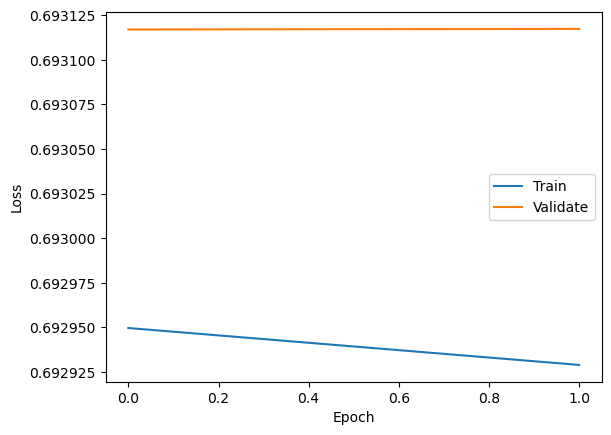

End time: 2023-10-07 13:16:30.968177
Total training time: 0:00:13.328737


In [12]:
#initialize a model, optimizer, and loss function
model = Network(MatDim)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.5, dampening=0) #--------------------------O,P,Q
loss_fn = nn.CrossEntropyLoss() #-------------------------------------------------------------------------------------R

#train model -------------------------------------------------------------------------------------------------------S,T
training_loop(2,
              model,
              optimizer,
              loss_fn,
              trainDataloader,
              valDataloader)

In [13]:
#create testing dataset
signalGenerator('C:/Users/HP/OneDrive/Documents/Python Scripts/GW_simulated_data', 
                'test_data', 
                MatDim, 
                100, #------------------------------------------------------------------------------------------------U
                AddEmptyData=True,
                PercentEmpty=50) #-------------------------------------------------------------------------------------V

Sample 1 was created.
Sample 100 was created.


In [14]:
#initialize testing dataset and dataloader
testData = SignalDataset('C:/Users/HP/OneDrive/Documents/Python Scripts/GW_simulated_data',
                          'test_data',
                          train=False)
testDataloader = DataLoader(testData, batch_size=batch, shuffle=True)

In [15]:
#determine model accuracy -------------------------------------------------------------------------------------------W
test(model, 'best_model.pt', trainDataloader, valDataloader, testDataloader)

Model created after epoch 1 with loss of 0.6931169629096985
Accuracy train: 0.5
Accuracy val: 0.5
Accuracy test: 0.5


predicted: 0, actual: 1, actual output: 0.002282241825014353


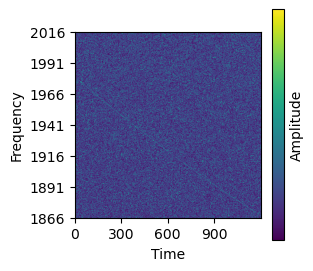

In [80]:
#test random sample using newly trained model
check(model, testData)